#### Audio Classification Data Preprocessing

In [17]:
### Let's read a sample audio using librosa
import librosa
audio_file_path=r'data\wavfiles\101308-10.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [18]:
print(librosa_audio_data)

[-0.07123382 -0.01959388  0.02903004 ... -0.01855745  0.08053251
  0.08402726]


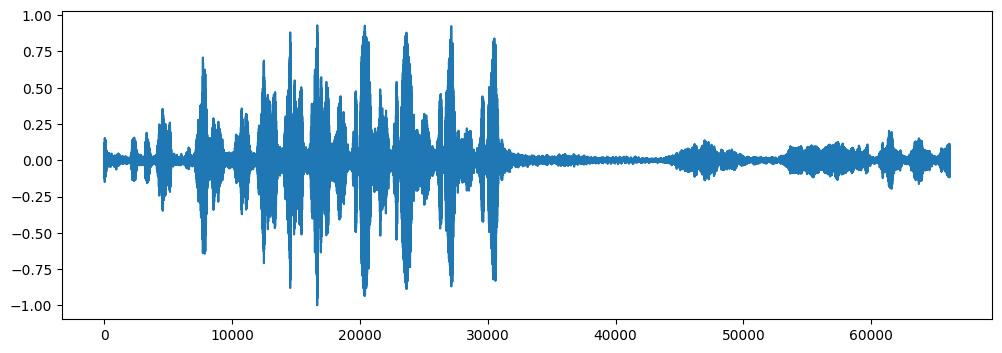

In [19]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [20]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [21]:
wave_audio

array([-0.07123382, -0.01959388,  0.02903004, ..., -0.01855745,
        0.08053251,  0.08402726], dtype=float32)

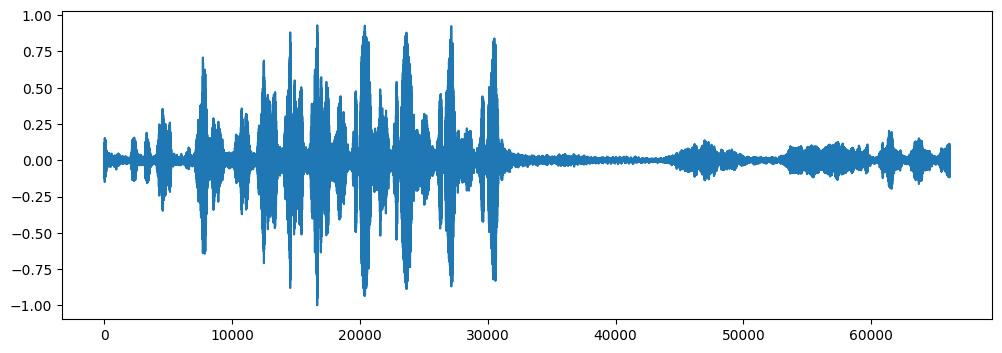

In [22]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [23]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 130)


In [24]:
mfccs

array([[-224.05038   , -207.49268   , -221.86847   , ..., -255.1221    ,
        -229.6697    , -241.59814   ],
       [  39.846916  ,   58.73062   ,   72.81018   , ...,   38.916313  ,
          25.606552  ,   14.501198  ],
       [ -61.316383  ,  -63.635605  ,  -50.717438  , ...,  -49.187332  ,
         -71.69531   ,  -68.41291   ],
       ...,
       [   3.5837893 ,   -0.26102185,    2.570578  , ...,    5.2185583 ,
           3.7936435 ,    2.6396475 ],
       [   8.083788  ,    1.665467  ,   -8.7856045 , ...,   -4.26429   ,
          -3.9673355 ,   -4.680196  ],
       [   2.8704016 ,    2.486259  ,   -3.2292264 , ...,    1.1697859 ,
           1.616718  ,    2.481183  ]], dtype=float32)

In [25]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='data\wavfiles'
metadata=pd.read_csv(r'data\bird_songs_metadata.csv')
metadata.drop("country",axis=1,inplace=True)
metadata.drop("location",axis=1,inplace=True)
metadata.head()

,id,genus,species,subspecies,name,recordist,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [29]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [30]:
# Check column names
print(metadata.columns)

# Print first few rows of the DataFrame
print(metadata.head())


Index(['id', 'genus', 'species', 'subspecies', 'name', 'recordist', 'latitude',
       'longitude', 'altitude', 'sound_type', 'source_url', 'license', 'time',
       'date', 'remarks', 'filename'],
      dtype='object')
       id       genus   species subspecies           name  \
0  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
1  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
2  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
3  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
4  557838  Thryomanes  bewickii        NaN  Bewick's Wren   

                recordist  latitude  longitude altitude  \
0  Whitney Neufeld-Kaiser   48.0708  -122.1006      100   
1  Whitney Neufeld-Kaiser   48.0708  -122.1006      100   
2  Whitney Neufeld-Kaiser   48.0708  -122.1006      100   
3  Whitney Neufeld-Kaiser   48.0708  -122.1006      100   
4  Whitney Neufeld-Kaiser   48.0708  -122.1006      100   

                   sound_type                   source_url

In [31]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["filename"]))
    final_class_labels=row["species"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

5422it [00:43, 125.91it/s]


In [19]:
print(metadata.shape)

(5422, 16)


In [20]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-132.85225, 81.1399, 17.018225, 54.974297, -1...",bewickii
1,"[-147.74393, 99.42544, 20.885643, 44.11881, 1....",bewickii
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",bewickii
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",bewickii
4,"[-107.95914, 92.416, 17.773254, 43.13245, -1.8...",bewickii


In [21]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [22]:
X.shape

(5422, 40)

In [23]:
y

array(['bewickii', 'bewickii', 'bewickii', ..., 'cardinalis',
       'cardinalis', 'cardinalis'], dtype='<U11')

In [24]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [25]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [26]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
X_train

array([[-271.31616   ,  -26.419062  ,  -63.76474   , ...,    2.588676  ,
          -3.9820173 ,    5.081394  ],
       [-401.3699    ,  -31.111542  ,  -92.24523   , ...,   -2.909355  ,
          -0.48502734,    1.7998824 ],
       [-366.7505    ,   -3.9161232 , -118.178535  , ...,   -2.0479558 ,
           1.2964003 ,    0.8230999 ],
       ...,
       [ -63.003605  ,   88.03719   ,  -30.77855   , ...,   -1.3984172 ,
          -1.8527051 ,   -1.1443155 ],
       [-361.90756   ,   30.67692   ,  -64.73752   , ...,   -1.6385154 ,
          -0.99096596,   -0.40422434],
       [-168.7206    ,    1.3105382 ,  -65.46302   , ...,    2.2687547 ,
          -1.4256755 ,   -2.3499906 ]], dtype=float32)

In [28]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [29]:
X_train.shape

(4337, 40)

In [30]:
X_test.shape

(1085, 40)

In [31]:
y_train.shape

(4337, 5)

In [32]:
y_test.shape

(1085, 5)

### Model Creation

In [27]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [29]:
### No of classes
num_labels=y.shape[1]

In [30]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [32]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [33]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
104/136 [=====================>........] - ETA: 0s - loss: 12.6206 - accuracy: 0.2145
Epoch 1: val_loss improved from inf to 1.55519, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 1s 4ms/step - loss: 10.5555 - accuracy: 0.2167 - val_loss: 1.5552 - val_accuracy: 0.3336
Epoch 2/100
 84/136 [=================>............] - ETA: 0s - loss: 2.6159 - accuracy: 0.2329

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


127/136 [===========================>..] - ETA: 0s - loss: 2.4206 - accuracy: 0.2333
Epoch 2: val_loss did not improve from 1.55519
136/136 [==============================] - 0s 3ms/step - loss: 2.3855 - accuracy: 0.2359 - val_loss: 1.6046 - val_accuracy: 0.2157
Epoch 3/100
125/136 [==========================>...] - ETA: 0s - loss: 1.7803 - accuracy: 0.2323
Epoch 3: val_loss did not improve from 1.55519
136/136 [==============================] - 0s 3ms/step - loss: 1.7738 - accuracy: 0.2333 - val_loss: 1.6035 - val_accuracy: 0.2157
Epoch 4/100
135/136 [============================>.] - ETA: 0s - loss: 1.6563 - accuracy: 0.2569
Epoch 4: val_loss did not improve from 1.55519
136/136 [==============================] - 0s 3ms/step - loss: 1.6574 - accuracy: 0.2564 - val_loss: 1.5714 - val_accuracy: 0.3530
Epoch 5/100
123/136 [==========================>...] - ETA: 0s - loss: 1.5925 - accuracy: 0.2759
Epoch 5: val_loss improved from 1.55519 to 1.51395, saving model to saved_models/audio_cla

Epoch 28/100
115/136 [========================>.....] - ETA: 0s - loss: 1.0687 - accuracy: 0.5098
Epoch 28: val_loss improved from 0.92297 to 0.91282, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 0s 3ms/step - loss: 1.0682 - accuracy: 0.5116 - val_loss: 0.9128 - val_accuracy: 0.5991
Epoch 29/100
114/136 [========================>.....] - ETA: 0s - loss: 1.0343 - accuracy: 0.5285
Epoch 29: val_loss improved from 0.91282 to 0.89201, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 0s 2ms/step - loss: 1.0309 - accuracy: 0.5329 - val_loss: 0.8920 - val_accuracy: 0.5972
Epoch 30/100
117/136 [========================>.....] - ETA: 0s - loss: 1.0346 - accuracy: 0.5294
Epoch 30: val_loss improved from 0.89201 to 0.88704, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 0s 2ms/step - loss: 1.0369 - accuracy: 0.5306 - val_loss: 0.8870 - val_accura

Epoch 54/100
136/136 [==============================] - ETA: 0s - loss: 0.7937 - accuracy: 0.6668
Epoch 54: val_loss improved from 0.63110 to 0.62141, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 0s 3ms/step - loss: 0.7937 - accuracy: 0.6668 - val_loss: 0.6214 - val_accuracy: 0.7788
Epoch 55/100
112/136 [=======================>......] - ETA: 0s - loss: 0.7713 - accuracy: 0.6708
Epoch 55: val_loss improved from 0.62141 to 0.61516, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 0s 2ms/step - loss: 0.7750 - accuracy: 0.6714 - val_loss: 0.6152 - val_accuracy: 0.7650
Epoch 56/100
118/136 [=========================>....] - ETA: 0s - loss: 0.7758 - accuracy: 0.6703
Epoch 56: val_loss did not improve from 0.61516
136/136 [==============================] - 0s 2ms/step - loss: 0.7755 - accuracy: 0.6696 - val_loss: 0.6172 - val_accuracy: 0.7539
Epoch 57/100
134/136 [===========================

Epoch 82/100
131/136 [===========================>..] - ETA: 0s - loss: 0.6658 - accuracy: 0.7385
Epoch 82: val_loss did not improve from 0.53643
136/136 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.7385 - val_loss: 0.5606 - val_accuracy: 0.8147
Epoch 83/100
120/136 [=========================>....] - ETA: 0s - loss: 0.6717 - accuracy: 0.7289
Epoch 83: val_loss improved from 0.53643 to 0.52927, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.7305 - val_loss: 0.5293 - val_accuracy: 0.8240
Epoch 84/100
112/136 [=======================>......] - ETA: 0s - loss: 0.6562 - accuracy: 0.7366
Epoch 84: val_loss did not improve from 0.52927
136/136 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.7316 - val_loss: 0.5309 - val_accuracy: 0.8184
Epoch 85/100
135/136 [============================>.] - ETA: 0s - loss: 0.6529 - accuracy: 0.7398
Epoch 85: v

In [34]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8580645322799683


In [35]:
X_test[1]

array([-189.45573   ,   62.150654  ,   19.43638   ,   55.768246  ,
         22.014147  ,    1.1670706 ,   10.744263  ,   25.974308  ,
          4.464322  ,    7.8037286 ,    9.627176  ,   13.46692   ,
          0.99146014,    5.444376  ,    1.2118231 ,    5.9565663 ,
         -3.0814357 ,    2.580064  ,   -1.0993097 ,    3.641694  ,
         -4.4661713 ,    0.74652123,   -1.9080474 ,    1.6144162 ,
         -4.795732  ,    0.72689617,   -2.5761786 ,    3.1347122 ,
         -2.5605636 ,    1.7595352 ,   -1.1499922 ,    3.5236385 ,
         -2.869519  ,    3.5089357 ,   -0.53583044,    0.93236935,
         -1.6913216 ,    4.6088724 ,   -0.92421067,    1.7950323 ],
      dtype=float32)

In [36]:
model.predict(X_test)

34/34 [==============================] - 0s 1ms/step


array([[4.9003094e-02, 5.4050821e-01, 5.3546749e-02, 7.7796482e-02,
        2.7914542e-01],
       [6.3727546e-04, 2.7526375e-03, 1.6614323e-03, 3.6903736e-01,
        6.2591130e-01],
       [1.4873264e-06, 7.7707837e-06, 2.3842200e-05, 7.7093303e-01,
        2.2903389e-01],
       ...,
       [2.1506234e-01, 4.4721015e-02, 6.8532538e-01, 9.7320434e-03,
        4.5159236e-02],
       [4.2911466e-08, 4.8987022e-07, 1.6983790e-06, 8.1604379e-01,
        1.8395409e-01],
       [4.5857257e-03, 9.3860012e-01, 7.4461186e-03, 4.9086441e-03,
        4.4459436e-02]], dtype=float32)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [6]:
from tensorflow.keras.models import load_model
filename=r"data\wavfiles\101308-2.wav"
model = load_model(r'saved_models\audio_classification.hdf5')
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
# Assuming predicted_label is a 2D array of shape (1, num_classes)
# Get the index of the class with the maximum probability
predicted_label = model.predict(mfccs_scaled_features)
predicted_class_index = np.argmax(predicted_label, axis=1)

# Use inverse_transform with the index of the predicted class
prediction_class = labelencoder.inverse_transform(predicted_class_index)

# Now, prediction_class is the class label for the predicted class
print(prediction_class)

prediction_class

NameError: name 'np' is not defined

In [38]:
metadata['species'].unique()

array(['bewickii', 'polyglottos', 'migratorius', 'melodia', 'cardinalis'],
      dtype=object)

In [4]:
filename=r"data\wavfiles\101308-2.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
prediction_label =model.predict(prediction_feature)
predicted_class_index = np.argmax(predicted_label, axis=1)
prediction_class = labelencoder.inverse_transform(predicted_class_index)

# Now, prediction_class is the class label for the predicted class
print(prediction_class)

prediction_class

NameError: name 'features_extractor' is not defined

In [37]:
# Assuming your DataFrame is named 'df' and the 'species' column contains the original species names
original_species_names = ['bewickii', 'polyglottos', 'migratorius', 'melodia', 'cardinalis']
new_species_names = ['Indian Peafowl (Pavo cristatus)', 'Indian Robin (Saxicoloides fulicatus)', 'Common Kingfisher (Alcedo atthis)', 'Indian Pond Heron (Ardeola grayii)', 'Asian Koel (Eudynamys scolopaceus)']

# Create a mapping dictionary
species_mapping = dict(zip(original_species_names, new_species_names))

# Replace the original species names with the new names
metadata['species'] = metadata['species'].replace(species_mapping)

# Print the modified DataFrame
metadata.head()

,id,genus,species,subspecies,name,recordist,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,Indian Peafowl (Pavo cristatus),NaN,Bewick's Wren,Whitney Neufeld-Kaiser,48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,Indian Peafowl (Pavo cristatus),NaN,Bewick's Wren,Whitney Neufeld-Kaiser,48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,Indian Peafowl (Pavo cristatus),NaN,Bewick's Wren,Whitney Neufeld-Kaiser,48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,Indian Peafowl (Pavo cristatus),NaN,Bewick's Wren,Whitney Neufeld-Kaiser,48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,Indian Peafowl (Pavo cristatus),NaN,Bewick's Wren,Whitney Neufeld-Kaiser,48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [41]:
filename="UrbanSound8K/audio/fold1/103059-11.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
# Assuming predicted_label is a 2D array of shape (1, num_classes)
# Get the index of the class with the maximum probability
predicted_label = model.predict(mfccs_scaled_features)
predicted_class_index = np.argmax(predicted_label, axis=1)

# Use inverse_transform with the index of the predicted class
prediction_class = labelencoder.inverse_transform(predicted_class_index)

# Now, prediction_class is the class label for the predicted class
print(prediction_class)

prediction_class

[-2.8771826e+02  4.6550282e+01 -6.3903604e+00  6.8245461e+01
  1.1622710e+01 -4.9540701e+00  1.7750635e+01  1.7552851e+01
  1.2536558e+00  3.5951886e+00  2.6356239e+00  1.2049607e+01
 -1.2428814e+00  5.3189573e+00  3.7953224e+00  7.8059330e+00
  3.8022346e+00  4.5373101e+00  2.1761768e+00  9.3085747e+00
  9.0707588e-01  3.5570068e+00  3.0370157e+00  6.8260198e+00
 -3.3203438e-01  3.6846983e+00  4.4173431e+00  3.7659364e+00
 -7.7175736e-01  4.0070114e+00  3.2468979e+00  2.9364157e+00
 -4.6278474e-01  4.8847780e+00  1.3384185e+00  2.2977622e+00
  1.4739509e-01  5.8536968e+00  1.2660931e+00  2.3170409e+00]
[[-2.8771826e+02  4.6550282e+01 -6.3903604e+00  6.8245461e+01
   1.1622710e+01 -4.9540701e+00  1.7750635e+01  1.7552851e+01
   1.2536558e+00  3.5951886e+00  2.6356239e+00  1.2049607e+01
  -1.2428814e+00  5.3189573e+00  3.7953224e+00  7.8059330e+00
   3.8022346e+00  4.5373101e+00  2.1761768e+00  9.3085747e+00
   9.0707588e-01  3.5570068e+00  3.0370157e+00  6.8260198e+00
  -3.3203438e-01 

array(['migratorius'], dtype='<U11')